Fig. 4c, d

In [1]:
import sys
import os
import argparse
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.colors import BoundaryNorm, Normalize
from matplotlib.patches import Circle

from DATA.MetUM_variables import UM_vars
from config import *
from CP4.utils.make_colorbar import MidpointNormalize
from CP4.make_composites.SM_contrast.a1_make_var_field_contrast import load_contrast_composite_var, load_contrast_composite_var_clim
from CP4.make_composites.SM_contrast.b1_make_var_field_anomaly_contrast import load_contrast_composite_mean_ano_field
from CP4.make_composites.SM_contrast.b1bis_make_3hourly_var_field_anomaly_contrast import  load_contrast_composite_mean_ano_field_3h
from CP4.make_composites.SM_contrast.b4_make_pl_var_anomaly_contrast import load_contrast_composite_mean_ano_pl
from CP4.make_composites.SM_contrast.significance.b4_compute_pl_var_significance_contrast_merge import load_contrast_composite_significance_pvalues_pl_merge
from CP4.plots.p_config import *

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [2]:
coords = [[(10., 18.), (-20., -10.)], [(10.,18.), (-14., -4.)], [(10.,18.), (-8., 2.)], [(10.,18.), (-2.,8.)], [(8.,16.), (8.,18.)]]
mean_iaxis = {'latitude': (2, 'N'), 'longitude': (1, 'E')}  # long cross-section -> mean across latitude (1)
mean_iaxis2 = {'latitude': (2, 'N'), 'longitude': (1, 'E')}  # long cross-section -> mean across latitude
VARDIC = UM_vars.VARDIC

In [3]:
ds='CP4A'
res=4
var_ref='twb'
var1='theta_wb_pl'
var2='u_pl'
var1_2 = 'theta_wb'
window=6
y0=1997
y1=2006
months=[5, 6, 7, 8, 9]
q_thresh=0.95
t_thresh=26.
min_hw_size=100.   # km2
max_hw_size=1000000.   # km2
sw=[4., 4.]
latw = [-0.1, 0.1]
lonw = [-2., 2.]
tw=[-72, 72]
n_days=3
meth='cc3d'
cnty=26
time=15
cross_section_axis='longitude'
lvls=None
pvalue=0.01  # km
length = 25
size = 'small'
size_length=25
flabel='c'

In [4]:
iaxis = mean_iaxis[cross_section_axis][0]
iaxis2 = mean_iaxis2[cross_section_axis][0]
cap = mean_iaxis[cross_section_axis][1]

years = np.arange(y0, y1+1, 1)
years_ = str(y0) + '-' + str(y1)
months_ = "-".join([str(m) for m in months])

res_ = str(res) + 'km'

swlat = sw[0]
swlon = sw[1]
latwmin = latw[0]
latwmax = latw[1]
assert latwmin < latwmax, "incorrect latitude window range"
lonwmin = lonw[0]
lonwmax = lonw[1]
assert lonwmin < lonwmax, "incorrect longitude window range"
latw_ = str(latwmin) + '-' + str(latwmax)
lonw_ = str(lonwmin) + '-' + str(lonwmax)

if cross_section_axis == 'longitude':
    assert swlon == -lonwmin + lonwmax, 'wrong spatial sampling'
elif cross_section_axis == 'latitude':
    assert swlat == -latwmin + latwmax, 'wrong spatial sampling'

space_scale = str(int(min_hw_size)) + '-' + str(int(max_hw_size))

tw_before = tw[0]
tw_after = tw[1]
assert tw_before <= tw_after, "Incorrect number of time steps"
tw_ = str(tw_before) + '_to_' + str(tw_after)

var_ = '$\\theta_{wb}$'
unit1 = '$^\circ$C'

In [5]:
pvalues = load_contrast_composite_significance_pvalues_pl_merge(ds, res, var_ref, var1, y0, y1, months, t_thresh, q_thresh, n_days, meth, cnty, window, latw, lonw, min_hw_size, max_hw_size, lvls, size, size_length)

w_mul_factor = 1.
windstep = 4

times = np.arange(tw_before, tw_after, 3)
assert time in times, 'Incorrect time'
itime = np.where(times == time)[0][0]

samtime = [time, time]

out_psrfc = []
out_var12 = []
out_pblh_hhee = []
out_pblh_clim = []
out_anos1 = []
out_anos2 = []
out_anos_w = []
out_anos_sh = []
out_anos_lh = []

for icoord, coord in enumerate(coords):
    lat_range = coord[0]
    lon_range = coord[1]

    psrfc = load_contrast_composite_var(ds, res, var_ref, 'p_srfc', y0, y1, months, t_thresh, q_thresh, n_days, meth, cnty, window, sw, tw, lat_range, lon_range, min_hw_size, max_hw_size, size, size_length)
    var12_ano = load_contrast_composite_mean_ano_field(ds, res, var_ref, var1_2, y0, y1, months, lat_range, lon_range, t_thresh, q_thresh, n_days, meth, cnty, window, sw, tw, [time, time], min_hw_size, max_hw_size, size, size_length)

    pblh_hhee = load_contrast_composite_var(ds, res, var_ref, 'PBLh', y0, y1, months, t_thresh, q_thresh, n_days, meth, cnty, window, sw, [-3, 3], lat_range, lon_range, min_hw_size, max_hw_size, size, size_length)
    pblh_clim = load_contrast_composite_var_clim(ds, res, var_ref, 'PBLh', y0, y1, months, t_thresh, q_thresh, n_days, meth, cnty, window, sw, [-3, 3], lat_range, lon_range, min_hw_size, max_hw_size, size, size_length)
    ds_ano1 = load_contrast_composite_mean_ano_pl(ds, res, var_ref, var1, y0, y1, months, lat_range, lon_range, t_thresh, q_thresh, n_days, meth, cnty, window, latw, lonw, min_hw_size, max_hw_size, lvls, size, size_length)
    ds_ano2 = load_contrast_composite_mean_ano_pl(ds, res, var_ref, var2, y0, y1, months, lat_range, lon_range, t_thresh, q_thresh, n_days, meth, cnty, window, latw, lonw, min_hw_size, max_hw_size, lvls, size, size_length)
    ds_ano_w = load_contrast_composite_mean_ano_pl(ds, res, var_ref, 'w_pl', y0, y1, months, lat_range, lon_range, t_thresh, q_thresh, n_days, meth, cnty, window, latw, lonw, min_hw_size, max_hw_size, lvls, size, size_length)

    print('{0} {1} (N={2})'.format(coord, ds_ano1.shape[1], ds_ano1.shape[0]))

    ano_field_sh = load_contrast_composite_mean_ano_field(ds, res, var_ref, 'sh', y0, y1, months, lat_range, lon_range, t_thresh, q_thresh, n_days, meth, cnty, window, sw, tw, samtime, min_hw_size, max_hw_size, size, size_length)
    ano_field_lh = load_contrast_composite_mean_ano_field(ds, res, var_ref, 'lh', y0, y1, months, lat_range, lon_range, t_thresh, q_thresh, n_days, meth, cnty, window, sw, tw, samtime, min_hw_size, max_hw_size, size, size_length)

    out_psrfc.append(psrfc)
    out_var12.append(var12_ano)
    out_pblh_hhee.append(pblh_hhee)
    out_pblh_clim.append(pblh_clim)
    out_anos1.append(ds_ano1)
    out_anos2.append(ds_ano2)
    out_anos_w.append(ds_ano_w)
    out_anos_sh.append(ano_field_sh)
    out_anos_lh.append(ano_field_lh)

out_psrfc = np.concatenate(out_psrfc, axis=0)
out_var12 = xr.concat(out_var12, dim='n')
out_pblh_hhee = np.concatenate(out_pblh_hhee, axis=0)
out_pblh_clim = np.concatenate(out_pblh_clim, axis=0)
out_pblh_clim = out_pblh_clim.reshape(out_pblh_hhee.shape)

out_anos1 = xr.concat(out_anos1, dim='n')
out_anos2 = xr.concat(out_anos2, dim='n')
out_anos_w = xr.concat(out_anos_w, dim='n')

out_anos_sh = xr.concat(out_anos_sh, dim='n')
out_anos_lh = xr.concat(out_anos_lh, dim='n')

lats = np.linspace(-sw[0]/2, sw[0]/2, out_psrfc.shape[2])
lons = np.linspace(-sw[1]/2, sw[1]/2, out_psrfc.shape[3])

out_pblh_hhee = xr.DataArray(data=out_pblh_hhee, dims=['n', 'time', 'y', 'x'], coords=dict(n=range(out_pblh_hhee.shape[0]), time=np.arange(tw_before, tw_after, 3), y=(['y'], lats), x=(['x'], lons)))
out_pblh_clim = xr.DataArray(data=out_pblh_clim, dims=['n', 'time', 'y', 'x'], coords=dict(n=range(out_pblh_clim.shape[0]), time=np.arange(tw_before, tw_after, 3), y=(['y'], lats), x=(['x'], lons)))
out_psrfc = xr.DataArray(data=out_psrfc, dims=['n', 'time', 'y', 'x'], coords=dict(n=range(out_psrfc.shape[0]), time=np.arange(tw_before, tw_after, 1), y=(['y'], lats), x=(['x'], lons)))

out_var12 = out_var12.assign_coords(y=(lats), x=(lons))

n_hhee = out_anos1.shape[0]

[(10.0, 18.0), (-20.0, -10.0)] 48 (N=18)
[(10.0, 18.0), (-14.0, -4.0)] 48 (N=24)
[(10.0, 18.0), (-8.0, 2.0)] 48 (N=24)
[(10.0, 18.0), (-2.0, 8.0)] 48 (N=30)
[(8.0, 16.0), (8.0, 18.0)] 48 (N=27)


In [6]:
#~ Treat data

nremovedlvls = 1

xs = np.linspace(-out_anos_w.shape[3]/2, out_anos_w.shape[3]/2, out_anos_w.shape[3])

out_pblh_hhee = out_pblh_hhee.sel(time=time)
out_pblh_clim = out_pblh_clim.sel(time=time)

out_anos1_ = out_anos1.sel(time=time).isel(pressure=slice(nremovedlvls,None))
out_anos2_ = out_anos2.sel(time=time).isel(pressure=slice(nremovedlvls,None))
out_anos_w_ = out_anos_w.sel(time=time).isel(pressure=slice(nremovedlvls,None))

out_anos2_ = out_anos2_.interp(x=out_anos2_.x[::windstep])
out_anos_w_ = out_anos_w_.interp(x=out_anos_w_.x[::windstep])

pvalues_ = pvalues[itime,nremovedlvls:,:]
pvalues_ = pvalues_.where(pvalues_ > pvalue, np.nan)
pvalues_.values[~np.isnan(pvalues_)] = 1

var_hhee_ano_mean1 = np.nanmean(out_anos1_, axis=0) # mean across events
var_hhee_ano_std1 = np.nanstd(out_anos1_, axis=0) # std across events
var_hhee_ano_mean2 = np.nanmean(out_anos2_, axis=0) # mean across events
var_hhee_ano_mean_w = np.nanmean(out_anos_w_, axis=0) # mean across events
var_hhee_ano_mean1_vprof = var_hhee_ano_mean1[:,int(var_hhee_ano_mean1.shape[1]/2)] # ano vertical profile above center point
var_hhee_ano_std1_vprof = var_hhee_ano_std1[:,int(var_hhee_ano_std1.shape[1]/2)]

ano_field_sh = out_anos_sh.assign_coords(x=xs, y=xs)
ano_field_lh = out_anos_lh.assign_coords(x=xs, y=xs)

averagegrdpt = np.array(latw) * 100 / 4.4
ano_field_sh_ = ano_field_sh.sel(y=slice(averagegrdpt[0], averagegrdpt[1])).mean(dim='y')
ano_field_lh_ = ano_field_lh.sel(y=slice(averagegrdpt[0], averagegrdpt[1])).mean(dim='y')
out_pblh_hhee_ = out_pblh_hhee.sel(y=slice(latw[0], latw[1]), x=slice(lonw[0], lonw[1])).mean(dim='y')
out_pblh_clim_ = out_pblh_clim.sel(y=slice(latw[0], latw[1]), x=slice(lonw[0], lonw[1])).mean(dim='y')

out_pblh_hhee_mean = out_pblh_hhee_.mean(dim='n') / 100
out_pblh_hhee_std = out_pblh_hhee_.std(dim='n') / 100
out_pblh_clim_mean = out_pblh_clim_.mean(dim='n') / 100
out_pblh_clim_std = out_pblh_clim_.std(dim='n') / 100
ano_field_sh_mean = ano_field_sh_.mean(dim='n')
ano_field_sh_std = ano_field_sh_.std(dim='n')
ano_field_lh_mean = ano_field_lh_.mean(dim='n')
ano_field_lh_std = ano_field_lh_.std(dim='n')

out_psrfc_ = out_psrfc.sel(time=time, y=slice(latw[0], latw[1]), x=slice(lonw[0], lonw[1]))
out_var12_ = out_var12.sel(y=slice(latw[0], latw[1]), x=slice(lonw[0], lonw[1]))

out_psrfc_ = np.nanmean(out_psrfc_, axis=iaxis2)    # mean along direction (latitude/longitude)
out_var12_ = np.nanmean(out_var12_, axis=iaxis2)    # mean along direction (latitude/longitude)

out_psrfc_mean = np.nanmean(out_psrfc_, axis=0) / 100   # mean across events
out_var12_mean = np.nanmean(out_var12_, axis=0)    # mean across events
out_var12_std = np.std(out_var12_, axis=0)

out_psrfc_center = out_psrfc_mean[int(out_psrfc_mean.shape[0]/2)]
out_var12_center = out_var12_mean[int(out_var12_mean.shape[0]/2)]
out_var12_center_std = out_var12_std[int(out_var12_std.shape[0]/2)]

out_psrfc_mean = np.nanmean(out_psrfc_mean)
out_var12_mean = out_var12_mean[np.newaxis,:]
var_hhee_ano_mean1_all = np.concatenate([out_var12_mean, var_hhee_ano_mean1])

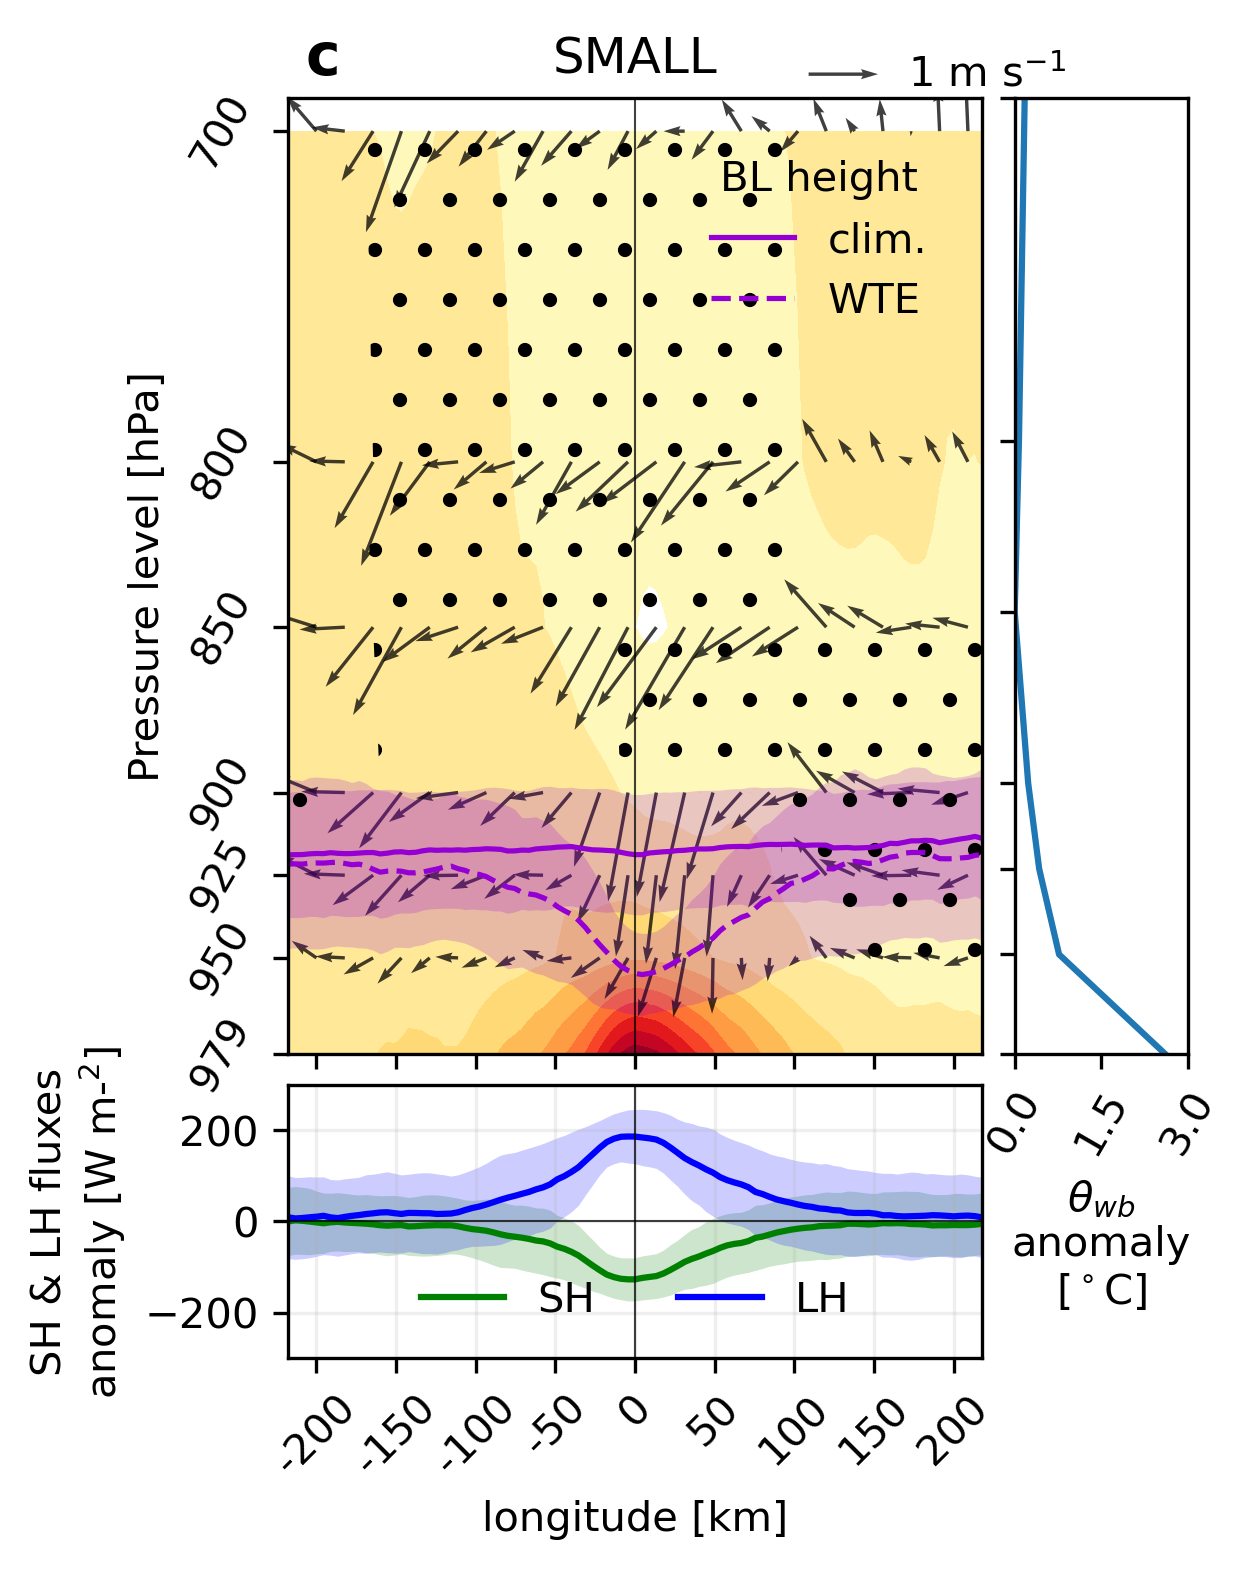

In [7]:
#~ Plot

lvls = [1000., 950, 925., 900, 850., 800., 700.]

anomin1 = round(np.nanmin(var_hhee_ano_mean1), 4)
anomax1 = round(np.nanmax(var_hhee_ano_mean1), 4)
anolim1 = max(abs(anomin1), abs(anomax1))

out_pblh_hhee_mean_2plot = 0.5-(out_pblh_hhee_mean - 950)*0.01
out_pblh_hhee_std_2plot = out_pblh_hhee_std*0.01
out_pblh_clim_mean_2plot = 0.5-(out_pblh_clim_mean - 950)*0.01
out_pblh_clim_std_2plot = out_pblh_clim_std*0.01

ysrfc = 0.5-abs(950 - out_psrfc_mean)*0.01
ys = [0.5, 0.75, 1., 1.5, 2., 3.]
ys_all = [ysrfc] + ys
xtlbs = np.arange(-200, 200+50, 50)
xtcks = xtlbs / 4.4
ytcks = [ysrfc, 0.5, 0.75, 1., 1.5, 2., 3.]
ytlbs = [str(int(round(out_psrfc_mean, 0)))] + [str(int(lvl)) for lvl in lvls[nremovedlvls:]]

cmap_ano = 'RdBu_r'

arrow_length_ano = 1.
anoscale = 10

var_hhee_ano_mean_w = var_hhee_ano_mean_w * 100   # for scaling

anolims = anolims_SM_contrast[var1]
anomin = 0.
anomax = 2.7

tfluxanomin = -200.
tfluxanomax = 200.
rfluxanomin = -40.
rfluxanomax = 40.

cmap = plt.get_cmap('YlOrRd')
cmap.set_under('w')
bounds = np.linspace(anomin, anomax, 11)
norm = BoundaryNorm(boundaries=bounds, ncolors=cmap.N)

fig_ano, ax_ano = plt.subplots(nrows=2, ncols=2, dpi=300, gridspec_kw={'height_ratios': [3.5, 1], 'width_ratios': [4, 1]})

plt.subplots_adjust(left=0.225, right=0.975, bottom=0.125, top=0.925, hspace=0.05, wspace=0.075)

p_ano = ax_ano[0][0].contourf(xs, ys_all, var_hhee_ano_mean1_all, levels=bounds, cmap=cmap)
pw_ano = ax_ano[0][0].quiver(xs[::windstep], ys, var_hhee_ano_mean2, var_hhee_ano_mean_w, color='k', alpha=0.75, scale=anoscale)

ax_ano[0][0].plot(xs, out_pblh_clim_mean_2plot, c='darkviolet', lw=1.25, ls='-', label='clim.')
ax_ano[0][0].fill_between(xs, out_pblh_clim_mean_2plot-out_pblh_clim_std_2plot, out_pblh_clim_mean_2plot+out_pblh_clim_std_2plot, color='darkviolet', linewidths=0., alpha=0.2)
ax_ano[0][0].plot(xs, out_pblh_hhee_mean_2plot, c='darkviolet', lw=1.25, ls='--', label='WTE')
ax_ano[0][0].fill_between(xs, out_pblh_hhee_mean_2plot-out_pblh_hhee_std_2plot, out_pblh_hhee_mean_2plot+out_pblh_hhee_std_2plot, color='darkviolet', linewidths=0., alpha=0.2)

ax_ano[0][0].contourf(xs, ys, pvalues_, hatches=['.'], colors='none')  # , alpha=0.5

ax_ano[1][0].plot(xs, ano_field_sh_mean.values, color='g', label='SH')
ax_ano[1][0].fill_between(xs, ano_field_sh_mean.values-ano_field_sh_std.values, ano_field_sh_mean.values+ano_field_sh_std.values, color='g', alpha=0.2, linewidths=0.)

ax_ano[1][0].plot(xs, ano_field_lh_mean.values, color='b', label='LH')
ax_ano[1][0].fill_between(xs, ano_field_lh_mean.values-ano_field_lh_std.values, ano_field_lh_mean.values+ano_field_lh_std.values, color='b', alpha=0.2, linewidths=0.)

var_hhee_ano_mean1_vprof_all = np.array([out_var12_center] + list(var_hhee_ano_mean1_vprof))
var_hhee_ano_std1_vprof_all = np.array([out_var12_center_std] + list(var_hhee_ano_std1_vprof))

ax_ano[0][1].plot(var_hhee_ano_mean1_vprof_all, ys_all)

fig_ano.delaxes(ax_ano[1][1])

ax_ano[0][0].text(0.025, 1.025, flabel, weight="bold", fontsize=14, transform=ax_ano[0][0].transAxes)

ax_ano[0][0].axvline(0, 0, 1, color='k', alpha=0.75, lw=0.5)
ax_ano[1][0].axvline(0, 0, 1, color='k', alpha=0.75, lw=0.5)
ax_ano[1][0].axhline(0, 0, 1, color='k', alpha=0.75, lw=0.5)

ylims = ax_ano[0][0].get_ylim()

ax_ano[0][0].set_xticks(xtcks)
ax_ano[0][0].set_xticklabels([])
ax_ano[0][0].set_yticks(ytcks)
ax_ano[0][0].set_yticklabels(ytlbs, rotation=60., va='center')
ax_ano[0][0].set_ylim(ylims)
ax_ano[0][0].set_ylim(ylims[0], ylims[1]+0.1)
ax_ano[0][0].set_ylabel('Pressure level [hPa]')
ax_ano[0][0].set_title('%s'%(size.upper()))

if size == 'small':
    ax_ano[0][0].legend(ncol=1, loc='upper right', bbox_to_anchor=[0.975, 0.975], title='BL height', framealpha=0.)

ax_ano[1][0].set_xticks(xtcks)
ax_ano[1][0].set_xticklabels(xtlbs, rotation=45)
ax_ano[1][0].set_xlabel('%s [km]' % cross_section_axis)
ax_ano[1][0].set_xlim(xs[0], xs[-1])
ytcks1 = ax_ano[1][0].get_yticks()
ax_ano[1][0].set_ylim(-300, 300)
ax_ano[1][0].set_ylabel('SH & LH fluxes\nanomaly [W m-$^2$]')
ax_ano[1][0].grid(True, alpha=0.2)

ax_ano[1][0].legend(loc='lower center', ncol=2, frameon=False)

xlims = (np.floor(var_hhee_ano_mean1_vprof_all.min()), np.ceil(var_hhee_ano_mean1_vprof_all.max()))
xlims = (0., 3.)

ax_ano[0][1].set_xlim(xlims)
ax_ano[0][1].set_xticks([0, 1.5, 3])
ax_ano[0][1].set_xlabel('%s\nanomaly\n[%s]'% (var_, unit1))
ax_ano[0][1].tick_params(axis='x', labelrotation=60)
ax_ano[0][1].set_yticks(ytcks)
ax_ano[0][1].set_yticklabels([])
ax_ano[0][1].set_ylim(ylims)

ax_ano[0][0].quiverkey(pw_ano, 0.85, 1.025, arrow_length_ano, label='%.f m s$^{-1}$'%arrow_length_ano, labelpos='E')

fig_ano.set_size_inches(4., 5.25)

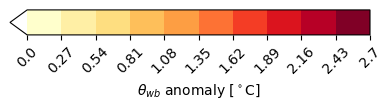

In [9]:
fig_cb_ano, ax_cb_ano = plt.subplots(figsize=(4.5, 1.))

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.65, top=0.9)

cb_ano = fig_cb_ano.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax_cb_ano, extend='min', orientation='horizontal', label='%s anomaly [%s]'% (var_, unit1), shrink=0.75, pad=0.15)

cbtks = bounds
cblbs = [str(round(b,2)) for b in bounds]
cb_unit = unit1

cb_ano.set_ticks(cbtks)
cb_ano.set_ticklabels(cblbs)
cb_ano.ax.tick_params(labelrotation=45.)